## Statistical Thinking for Data Science Assignment 3
## Data Science Models for Telecommunication Marketing Campaigns
##### Juan Diego Balsero Leon
##### Student ID: 24896577

### Initial Setup

In [47]:
#Importing the python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing statsmodels api
import statsmodels.api as sm
from scipy import stats

#Importing sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


#Importing 'warnings' to ignore future warnings and Data conversion warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

#Displaying all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [48]:
data = pd.read_csv('TeleCom_Data_2.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
data.shape

(41180, 21)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [51]:
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41180.000000,41180,41180,41180,41180,41180,41180,41180,41180,41180,41180.000000,41180.000000,41180.000000,41180.000000,41180,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24921,12166,32581,21571,33943,26140,13765,8622,NaN,NaN,NaN,NaN,35559,NaN,NaN,NaN,NaN,NaN,36542
mean,40.021710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.280427,2.567800,962.516707,0.172705,NaN,0.081901,93.575508,-40.501999,3.621422,5167.053344,NaN
std,10.419593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.299856,2.770225,186.809028,0.493719,NaN,1.571037,0.578762,4.627358,1.734385,72.230334,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Feature Selection

* PDays: Due to the high amount of values of 999 days of contact after the last campaign, it is clear that it is an error. According to the data dictionary, the -1 value means the client was not previously contacted. This value is not present in any row of pdays. The solution to the issue could be rather delete the column or replace its value per the default -1 assuming no previous contact with clients. Hence, this column will not be taked into account for the modelling phase.

In [54]:
data.drop('pdays', axis=1, inplace=True)

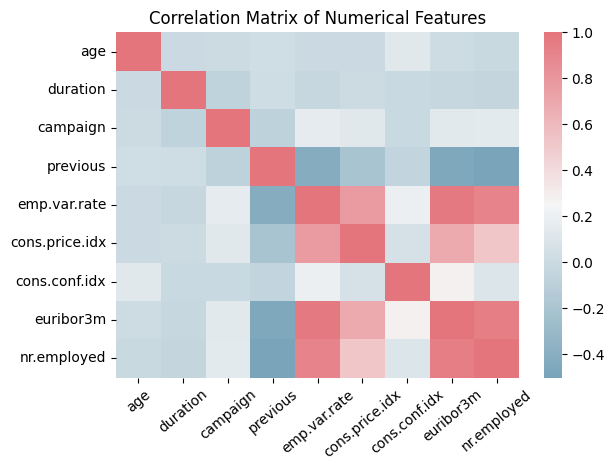

In [57]:
# Correlation analysis for numerical columns
numerical_columns = data.select_dtypes(include = ['int64', 'float64']).columns
sns.heatmap(data[numerical_columns].corr(), cmap=sns.diverging_palette(230, 10, n=1001), alpha=0.7)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=40)
plt.tight_layout()
# plt.savefig('correlation_matrix.png', dpi=300)

There are signs of multicolinearity on the index columns (euribor, consumer price, employment variation and number employed)

In [78]:
selected_columns = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']

correlation_matrix = data[selected_columns].corr()

print(correlation_matrix)

                emp.var.rate  cons.price.idx  euribor3m  nr.employed
emp.var.rate        1.000000        0.775655   0.972266     0.907141
cons.price.idx      0.775655        1.000000   0.688729     0.522899
euribor3m           0.972266        0.688729   1.000000     0.945218
nr.employed         0.907141        0.522899   0.945218     1.000000


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[selected_columns]
X['constant'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1] - 1)]  # Exclude the constant

print(vif_data)

          Feature        VIF
0    emp.var.rate  32.553062
1  cons.price.idx   4.675213
2       euribor3m  31.138032
3     nr.employed  14.392305


C:\Users\juand\AppData\Local\Temp\ipykernel_24540\1919145305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['constant'] = 1


Looking at the correlation between those variables, and considering the VIF score ranking obtained, the columns employment var rate, euribor3m and nr.employed exhibit clear signs of multicolinearity (correlation higher than 0.9 and VIF score higher than 10). For that reason this columns should be removed from the analysis to avoid noise in the models.

In [76]:
print(numerical_columns)
def mann_whitney_significant_features(df, cols, target):
    significant_features = []
    for col in cols:
        u_stat, p_value = stats.ttest_ind(df[df[target]=='yes'][col], df[df[target]=='no'][col])
        if p_value < 0.05:
            significant_features.append(col)
    
    return significant_features

print(mann_whitney_significant_features(data, numerical_columns, 'y'))

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [74]:
categorical_columns = data.select_dtypes(include = 'object').columns
categorical_columns = categorical_columns[categorical_columns != 'y']
def chi2_significant_features(df, cols, target):
    significant_features = []
    for col in cols:
        chi2, p, dof, expected  = stats.chi2_contingency(pd.crosstab(df[target], df[col]))
        if p < 0.05:
            significant_features.append(col)
    
    return significant_features

print(chi2_significant_features(data, categorical_columns, 'y'))

['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']


Housing and loan were considered not significant features in relation with the target variable. Considering the day of week, the distribution explored in the EDA shows minimal differences between positive and negative outcomes on the marketing campaign so this column will not be considered into the final feature set.

In [80]:
data_features_final = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx',
                       'job', 'marital', 'education', 'default', 'contact', 'month', 'poutcome', 'y']

### Data Cleaning

Since the EDA was previously performed on the assignment 1, this notebook will only perform the changes and address the issues identified on the selected columns

In [81]:
data_cleaned = data[data_features_final].copy()

In [82]:
#Identifying duplicated values
mask = data_cleaned.duplicated()
print(data_cleaned[mask].value_counts())

age  duration  campaign  previous  cons.price.idx  cons.conf.idx  job          marital   education            default  contact    month  poutcome     y  
42   71        1         0         93.444          -36.1          admin.       married   university.degree    no       cellular   aug    nonexistent  no     2
24   114       1         0         93.075          -47.1          services     single    high.school          no       cellular   apr    nonexistent  no     1
37   101       2         0         93.444          -36.1          technician   single    professional.course  no       cellular   aug    nonexistent  no     1
     356       1         0         93.444          -36.1          admin.       married   university.degree    no       cellular   aug    nonexistent  no     1
38   117       2         0         94.465          -41.8          admin.       married   high.school          no       telephone  jun    nonexistent  no     1
39   23        1         0         94.465          

In [83]:
# Verifying and deleting duplicated values
data_cleaned.drop_duplicates(inplace=True)
data_cleaned.shape

(41120, 14)

In [84]:
# Verifying null values
data_cleaned.isnull().sum().sum()

0

In [85]:
#Checking for outliers in all the numerical columns
numerical_columns = data_cleaned.select_dtypes(include = ['int64', 'float64']).columns

#Checking the outliers in a non-graphical way
Q1 = data_cleaned[numerical_columns].quantile(0.25)
Q3 = data_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_cleaned[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_cleaned[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

#Displaying the outliers
print(f"Outliers in the numerical columns : \n{outliers}")


Outliers in the numerical columns : 
age                467
duration          2955
campaign          2406
previous          5620
cons.price.idx       0
cons.conf.idx      446
dtype: int64


In [86]:
percentage_outliers = (outliers / data_cleaned.shape[0]) * 100
print(f"Percentage of outliers in the numerical columns : \n{percentage_outliers}")

Percentage of outliers in the numerical columns : 
age                1.135700
duration           7.186284
campaign           5.851167
previous          13.667315
cons.price.idx     0.000000
cons.conf.idx      1.084630
dtype: float64


Considering that duration and campaign possess more than 5% of outliers, this data will be handled. For previous the high value of outliers correspond to the amount of 0 meaning no previous contact for most customers, however, this information could be valuable to test with the model performance so these values will be maintained.

Text(0, 0.5, 'Frequency')

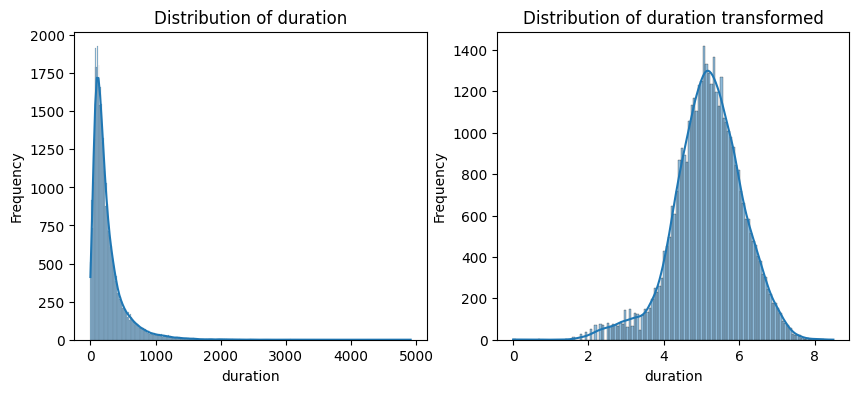

In [87]:
#Log Transformation for duration column
data_cleaned['log_duration'] = np.log1p(data_cleaned['duration'])

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['duration'], kde = True)
plt.title(f"Distribution of duration")
plt.xlabel('duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['log_duration'], kde = True)
plt.title(f"Distribution of duration transformed")
plt.xlabel('duration')
plt.ylabel('Frequency')

Log transformation was applied taking into account that the outliers in duration often corresponds to extreme values but not necessarily an issue with the data because the call duration may vary often depending on the customer and the sales team persistence. Log transformation helps to reduce the effect of the outliers by compressing the range, obtaining a nearly-normal distribution.

In [88]:
#Outlier Removal applying IQR for campaign column
Q1 = data_cleaned['campaign'].quantile(0.25)
Q3 = data_cleaned['campaign'].quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data_cleaned[(data_cleaned['campaign'] >= (Q1 - 1.5 * IQR)) & (data_cleaned['campaign'] <= (Q3 + 1.5 * IQR))]

data_cleaned.shape

(38714, 15)

For Campaign, the outliers correspond to most erroneous contacts, considering that users with more than 50 contacts in the same campaign does not seem to be a possible case for the telecommunication marketing team because of the time wasted only in few customers instead of trying to get more sales from new potential customers. To handle that error values, IQR removal was then applied